In [2]:
# import libraries

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
import cartopy
import cartopy.crs as ccrs
import matplotlib
from netCDF4 import Dataset
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy.ma as ma

import os
import matplotlib.colors as colors

import scipy
from cartopy.util import add_cyclic_point
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import glob

print ('libraries imported')

libraries imported


In [3]:
#read all diff files

from os import walk

f = []
mypath = "/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/diff_sst_MS"

for (dirpath, dirnames, filenames) in walk(mypath):
    f.extend(filenames)
    if '.DS_Store' in f:
        f.remove('.DS_Store')
    break
    
f

['PMIP4_lig127k_diff_sst_spatialmean_djf.nc',
 'PMIP4_lig127k_diff_sst_spatialmean_jja.nc',
 'PMIP4_1pctCO2_diff_sst_spatialmean_djf.nc',
 'PMIP4_1pctCO2_diff_sst_spatialmean_jja.nc',
 'PMIP4_lgm_diff_sst_spatialmean_jja.nc',
 'PMIP4_abrupt4xCO2_diff_sst_spatialmean_djf.nc',
 'PMIP4_midHolocene_diff_sst_spatialmean_jja.nc',
 'PMIP4_midHolocene_diff_sst_spatialmean_djf.nc',
 'PMIP4_abrupt4xCO2_diff_sst_spatialmean_jja.nc',
 'PMIP4_lgm_diff_sst_spatialmean_djf.nc']

In [4]:
#define subplot files
lgm_djf= xr.open_dataset("/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/diff_sst_MS/PMIP4_lgm_diff_sst_spatialmean_djf.nc", decode_times=False) 
lgm_jja= xr.open_dataset("/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/diff_sst_MS/PMIP4_lgm_diff_sst_spatialmean_jja.nc", decode_times=False)
mh_djf= xr.open_dataset("/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/diff_sst_MS/PMIP4_midHolocene_diff_sst_spatialmean_djf.nc", decode_times=False) 
mh_jja= xr.open_dataset("/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/diff_sst_MS/PMIP4_midHolocene_diff_sst_spatialmean_jja.nc", decode_times=False)
lig_djf= xr.open_dataset("/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/diff_sst_MS/PMIP4_lig127k_diff_sst_spatialmean_djf.nc", decode_times=False) 
lig_jja= xr.open_dataset("/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/diff_sst_MS/PMIP4_lig127k_diff_sst_spatialmean_jja.nc", decode_times=False)
pctco2_djf= xr.open_dataset("/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/diff_sst_MS/PMIP4_1pctCO2_diff_sst_spatialmean_djf.nc", decode_times=False) 
pctco2_jja= xr.open_dataset("/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/diff_sst_MS/PMIP4_1pctCO2_diff_sst_spatialmean_jja.nc", decode_times=False)
abrupt_djf= xr.open_dataset("/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/diff_sst_MS/PMIP4_abrupt4xCO2_diff_sst_spatialmean_djf.nc", decode_times=False)
abrupt_jja= xr.open_dataset("/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/diff_sst_MS/PMIP4_abrupt4xCO2_diff_sst_spatialmean_jja.nc", decode_times=False)
print ('files read')

files read


In [5]:
#mean the files
lgm_djf_mean= lgm_djf.mean(dim='gcms', skipna=True, keep_attrs=True)
lgm_jja_mean= lgm_jja.mean(dim='gcms', skipna=True, keep_attrs=True)
mh_djf_mean= mh_djf.mean(dim='gcms', skipna=True, keep_attrs=True)
mh_jja_mean= mh_jja.mean(dim='gcms', skipna=True, keep_attrs=True)
lig_djf_mean= lig_djf.mean(dim='gcms', skipna=True, keep_attrs=True)
lig_jja_mean= lig_jja.mean(dim='gcms', skipna=True, keep_attrs=True)
pctco2_djf_mean= pctco2_djf.mean(dim='gcms', skipna=True, keep_attrs=True)
pctco2_jja_mean= pctco2_jja.mean(dim='gcms', skipna=True, keep_attrs=True)
abrupt_djf_mean= abrupt_djf.mean(dim='gcms', skipna=True, keep_attrs=True)
abrupt_jja_mean= abrupt_jja.mean(dim='gcms', skipna=True, keep_attrs=True)

In [15]:
#set boundaries

a=lgm_djf_mean['sst_spatialmean_djf']
b=lgm_jja_mean['sst_spatialmean_jja']
c=mh_djf_mean['sst_spatialmean_djf']
d=mh_jja_mean['sst_spatialmean_jja']
e=lig_djf_mean['sst_spatialmean_djf']
f=lig_jja_mean['sst_spatialmean_jja']
g=pctco2_djf_mean['sst_spatialmean_djf']
h=pctco2_jja_mean['sst_spatialmean_jja']
i=abrupt_djf_mean['sst_spatialmean_djf']
j=abrupt_jja_mean['sst_spatialmean_jja']

array = [a, b, c, d, e, f, g, h,i, j]

lat=lgm_djf_mean['lat']
lon=lgm_djf_mean['lon']

In [16]:
array

[<xarray.DataArray 'sst_spatialmean_djf' (lat: 180, lon: 360)>
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]])
 Coordinates:
   * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
   * lon      (lon) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5,
 <xarray.DataArray 'sst_spatialmean_jja' (lat: 180, lon: 360)>
 array([[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [-0.41582181, -0.41580549, -0.41578724, ..., -0.4158883 ,
         -0.41584916, -0.41583

In [8]:
def plotmap(field_to_plot, lat, lon):

    cmap= plt.get_cmap('bwr') #define colour map
    clim=[-6.5,6.5]
    bounds = np.linspace(clim[0], clim[1], 21)
    norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
    region=[-100, 20, -40, 40] #[lon_min, lon_max, lat_min, lat_max]
    projection = ccrs.PlateCarree(central_longitude=0.0, globe=None)
    transform= ccrs.PlateCarree()
    plt.figure(figsize=(10,7))
    ax= plt.axes(projection=projection)
    ax.coastlines()
    gl= ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_left = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    fig=ax.contourf(lon, lat, field_to_plot, levels=bounds, transform=transform, cmap=cmap, norm=norm)
    ax.set_extent(region, ccrs.PlateCarree())
    cax, kw = matplotlib.colorbar.make_axes(ax,location='bottom', pad=0.05, shrink=0.7)
    plt.colorbar(fig,cax=cax, extend='both', **kw)
    ax.text(0.5, 1.0225, filename, va='bottom', ha='center', 
        rotation='horizontal', rotation_mode='anchor', fontweight='bold', fontsize='14',
        transform=ax.transAxes)
    ax.text(0.5, -0.25, 'Mean Annual SST ($^\circ$C)', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor', fontweight='bold',
        transform=ax.transAxes)   


In [9]:
lat=lgm_djf_mean['lat']
lon=lgm_djf_mean['lon']

plt.subplots(5,2,1,)
plotmap(a,lat, lon)

plt.subplot(5,2,2)
plotmap(b,lat, lon)

/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Passing the sharex parameter of subplots() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  after removing the cwd from sys.path.
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: sharex argument to subplots() was an integer.  Did you intend to use subplot() (without 's')?
  after removing the cwd from sys.path.


ValueError: 1 is not a valid value for sharex; supported values are 'all', 'row', 'col', 'none'

<Figure size 432x288 with 0 Axes>

AttributeError: 'NoneType' object has no attribute 'spines'

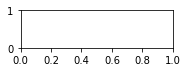

In [19]:
#plotting 

#temperatures

cmap= plt.get_cmap('bwr') #define colour map

#define colormap's range and scale

clim=[-6,6]
bounds = np.linspace(clim[0], clim[1], 21)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)

#regional map 

region=[-80, 20, -40, 30] #[lon_min, lon_max, lat_min, lat_max]

projection = ccrs.PlateCarree(central_longitude=0.0, globe=None)
transform= ccrs.PlateCarree()


#plt.figure(figsize=(10,7))
#ax= plt.axes(projection=projection)


ax.coastlines()
gl= ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False

#gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

plt.subplot(5,2,1)
fig1=ax.contourf(lon, lat, a, levels=bounds, transform=transform, cmap=cmap, norm=norm)
ax.set_extent(region, ccrs.PlateCarree())
plt.subplot(5,2,2)
fig2=ax.contourf(lon, lat, b, levels=bounds, transform=transform, cmap=cmap, norm=norm)
ax.set_extent(region, ccrs.PlateCarree())

fig3=ax.contourf(lon, lat, c, levels=bounds, transform=transform, cmap=cmap, norm=norm)
ax.set_extent(region, ccrs.PlateCarree())

fig4=ax.contourf(lon, lat, d, levels=bounds, transform=transform, cmap=cmap, norm=norm)
ax.set_extent(region, ccrs.PlateCarree())

fig5=ax.contourf(lon, lat, e, levels=bounds, transform=transform, cmap=cmap, norm=norm)
ax.set_extent(region, ccrs.PlateCarree())

fig6=ax.contourf(lon, lat, f, levels=bounds, transform=transform, cmap=cmap, norm=norm)
ax.set_extent(region, ccrs.PlateCarree())


#colourbar
cax, kw = matplotlib.colorbar.make_axes(ax,location='bottom', pad=0.05, shrink=0.7)
plt.colorbar(fig,cax=cax, extend='both', **kw)

fig

TypeError: cannot unpack non-iterable AxesSubplot object

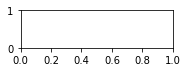

In [13]:
#create subplot

fig, ax = plo

#plotting 

#temperatures

cmap= plt.get_cmap('bwr') #define colour map

#define colormap's range and scale

clim=[-6,6]
bounds = np.linspace(clim[0], clim[1], 21)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)

#regional map 

region=[-80, 20, -40, 30] #[lon_min, lon_max, lat_min, lat_max]

projection = ccrs.PlateCarree(central_longitude=0.0, globe=None)
transform= ccrs.PlateCarree()


plt.figure(figsize=(10,7))
ax= plt.axes(projection=projection)


ax.coastlines()
gl= ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False

#gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER


fig=ax.contourf(lon, lat, a, levels=bounds, transform=transform, cmap=cmap, norm=norm)
ax.set_extent(region, ccrs.PlateCarree())

#colourbar
cax, kw = matplotlib.colorbar.make_axes(ax,location='bottom', pad=0.05, shrink=0.7)
plt.colorbar(fig,cax=cax, extend='both', **kw)